## Попова Софья. Проверка гипотез


Руководство компании обратило внимание на то, что сотрудники старше 35 лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин количество пропусков рабочих дней в связи с больничным выше, чем среди женщин. В связи с этой ситуацией, руководство организации планирует ввести дополнительные медицинские осмотры среди групп риска. 
Вам необходимо проверить следующие гипотезы:
- 1)	Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.
- 2)	Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

Загрузка файла

In [18]:
data = pd.read_csv("Статистика.csv")

Вывод данных

In [19]:
data

,Количество больничных дней,Возраст,Пол
0,5,39,"""Ж"""
1,4,54,"""М"""
2,4,26,"""М"""
3,5,42,"""М"""
4,4,29,"""М"""
...,...,...,...
232,5,30,"""М"""
233,4,36,"""Ж"""
234,2,60,"""Ж"""
235,2,44,"""Ж"""


### Распределение количества больничных дней по полу

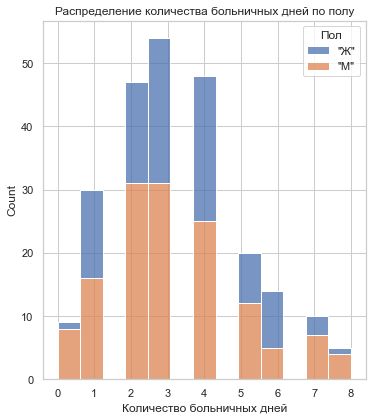

In [10]:
# Настройки для графиков
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.figure(figsize=(10, 6))

# Распределение количества больничных дней по полу
plt.subplot(1, 2, 1)
sns.histplot(data=data, x="Количество больничных дней", hue="Пол", multiple="stack")
plt.title("Распределение количества больничных дней по полу")

plt.tight_layout()
plt.show()

### Распределение количества больничных дней по возрасту

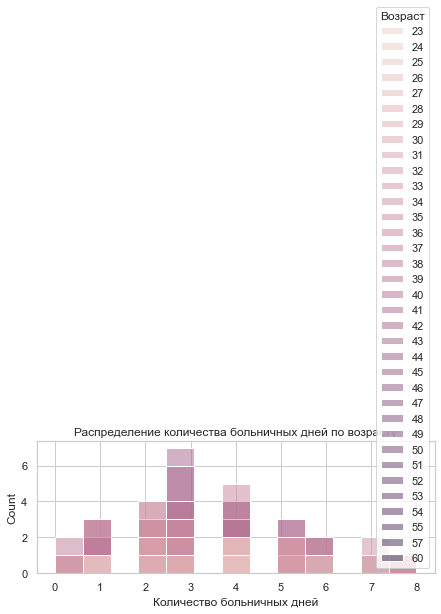

In [22]:
plt.subplot(1, 2, 2)
sns.histplot(data=data, x="Количество больничных дней", hue="Возраст")
plt.title("Распределение количества больничных дней по возрасту")

plt.tight_layout()
plt.show()

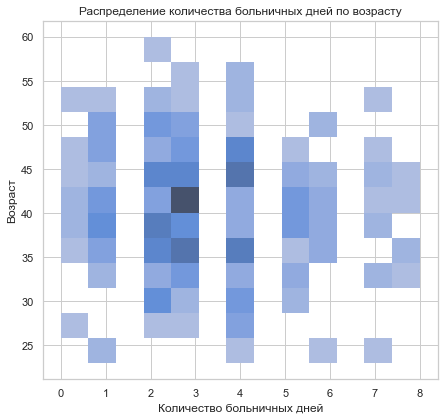

In [14]:
plt.subplot(1, 2, 2)
sns.histplot(data=data, x="Количество больничных дней",y='Возраст')
plt.title("Распределение количества больничных дней по возрасту")

plt.tight_layout()
plt.show()

### Гипотеза 1

Мужчины и женщины пропускают одинаковое количество рабочих дней по болезни

In [6]:
men = data[data['Пол'] == 'М']['Количество больничных дней']
women = data[data['Пол'] == 'Ж']['Количество больничных дней']

men_above_threshold = men[men > 2]
women_above_threshold = women[women > 2]

# Проверка гипотезы 1
t_statistic, p_value = ttest_ind(men_above_threshold, women_above_threshold)

if p_value < 0.05:
    print("Результат: Гипотеза 1 отвергается.")
    print(f"Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.")
else:
    print("Результат: Гипотеза 1 не отвергается.")
    print("Нет статистически значимой разницы в пропущенных рабочих днях по болезни между мужчинами и женщинами.")


Результат: Гипотеза 1 не отвергается.
Нет статистически значимой разницы в пропущенных рабочих днях по болезни между мужчинами и женщинами.


### Гипотеза 2

Сотрудники старше 35 лет пропускают более 2 рабочих дней по болезни чаще, чем молодые сотрудники

In [7]:
young_employees = data[data['Возраст'] <= 35]['Количество больничных дней']
older_employees = data[data['Возраст'] > 35]['Количество больничных дней']

young_employees = data[data['Возраст'] <= 35]['Количество больничных дней']
older_employees = data[data['Возраст'] > 35]['Количество больничных дней']

young_employees_above_threshold = young_employees[young_employees > 2]
older_employees_above_threshold = older_employees[older_employees > 2]

# Проверка гипотезы 2
t_statistic_age, p_value_age = ttest_ind(older_employees_above_threshold, young_employees_above_threshold)

if p_value_age < 0.05:
    print("Результат: Гипотеза 2 отвергается.")
    print(f"Сотрудники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще, чем молодые сотрудники.")
else:
    print("Результат: Гипотеза 2 не отвергается.")
    print(f"Нет статистически значимой разницы в пропущенных рабочих днях по болезни между сотрудниками старше 35 лет и молодыми сотрудниками.")

Результат: Гипотеза 2 не отвергается.
Нет статистически значимой разницы в пропущенных рабочих днях по болезни между сотрудниками старше 35 лет и молодыми сотрудниками.
